In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
import sklearn as skl
import sklearn.model_selection as skms
import sklearn.preprocessing as skpp
import pylab as pl
from pandas.plotting import scatter_matrix

In [65]:
# Reading the data into a dataframe
df = pd.read_csv('phpMawTba.csv')
df = pd.DataFrame(df)
df.head()
# df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


[Text(0, 0.5, 'age'),
 Text(0, 1.5, 'fnlwgt'),
 Text(0, 2.5, 'education-num'),
 Text(0, 3.5, 'capital-gain'),
 Text(0, 4.5, 'capital-loss'),
 Text(0, 5.5, 'hours-per-week')]

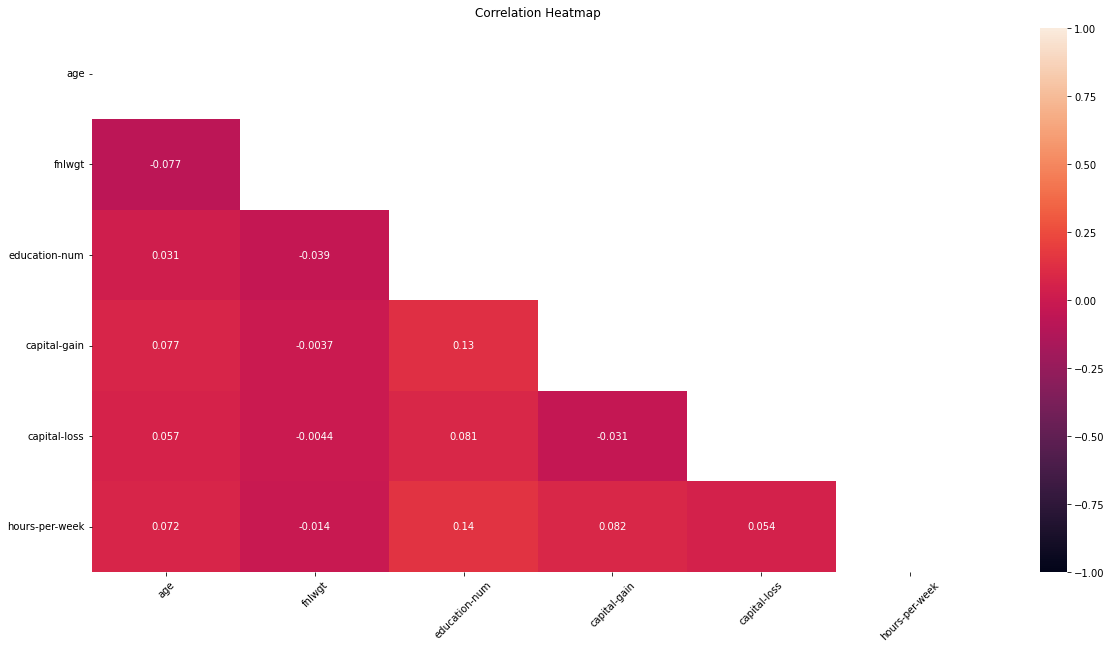

In [66]:
# Exploring correlation of the dataset

# Increase heat map size
plt.figure(figsize=(20, 10))

# Creating mask
mask = np.triu(np.ones_like(df.corr()))

# Create heatmap
corr_heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, mask=mask)

# Create heatmap title
corr_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

# Change orientation of labels
corr_heatmap.set_xticklabels(corr_heatmap.get_xticklabels(),rotation = 45)
corr_heatmap.set_yticklabels(corr_heatmap.get_yticklabels(),rotation = 0)



array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

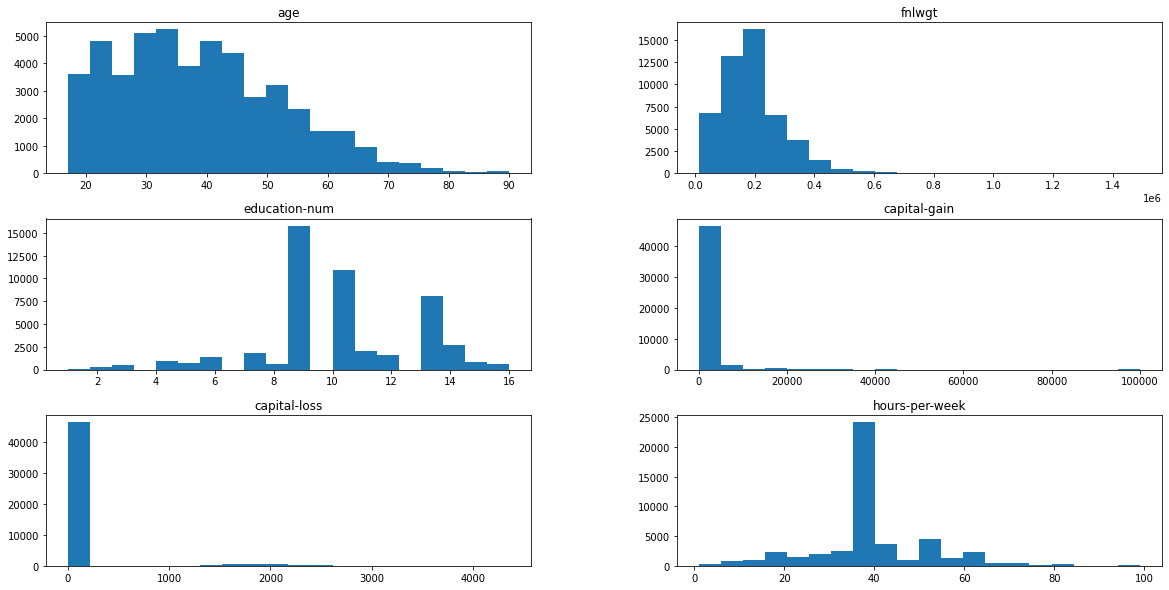

In [67]:
# Exploring individual variable data

# Creating histogram
df.hist(figsize=(20, 10), grid=False, bins=20)

In [68]:
# Helpful to use regarding relationships between variables -- should be step #2 of exploring the dataset
# scatter_matrix(df[:,:],
#                figsize=(10, 10))
# plt.show()

In [69]:
# Creating the label encoder to change categorical columns to numberic columns
labelencoder = skpp.LabelEncoder()
df_categorical = df[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']]
len(df_categorical)

48842

In [83]:
# Changing the categorical columns to numerical columns
df['WorkClass_N'] = labelencoder.fit_transform(df_categorical['workclass'])
prediction_decoded_workclass = labelencoder.inverse_transform(df['WorkClass_N'])
print(prediction_decoded_workclass.values)
df['Education_N'] = labelencoder.fit_transform(df_categorical['education'])
df['Marital_Status_N'] = labelencoder.fit_transform(df_categorical['marital-status'])
df['Occupation_N'] = labelencoder.fit_transform(df_categorical['occupation'])
df['Relationship_N'] = labelencoder.fit_transform(df_categorical['relationship'])
df['Race_N'] = labelencoder.fit_transform(df_categorical['race'])
df['Sex_N'] = labelencoder.fit_transform(df_categorical['sex'])
df['Native_Country_N'] = labelencoder.fit_transform(df_categorical['native-country'])
df.head()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

array([[<AxesSubplot:title={'center':'WorkClass_N'}>,
        <AxesSubplot:title={'center':'Education_N'}>,
        <AxesSubplot:title={'center':'Marital_Status_N'}>],
       [<AxesSubplot:title={'center':'Occupation_N'}>,
        <AxesSubplot:title={'center':'Relationship_N'}>,
        <AxesSubplot:title={'center':'Race_N'}>],
       [<AxesSubplot:title={'center':'Sex_N'}>,
        <AxesSubplot:title={'center':'Native_Country_N'}>,
        <AxesSubplot:>]], dtype=object)

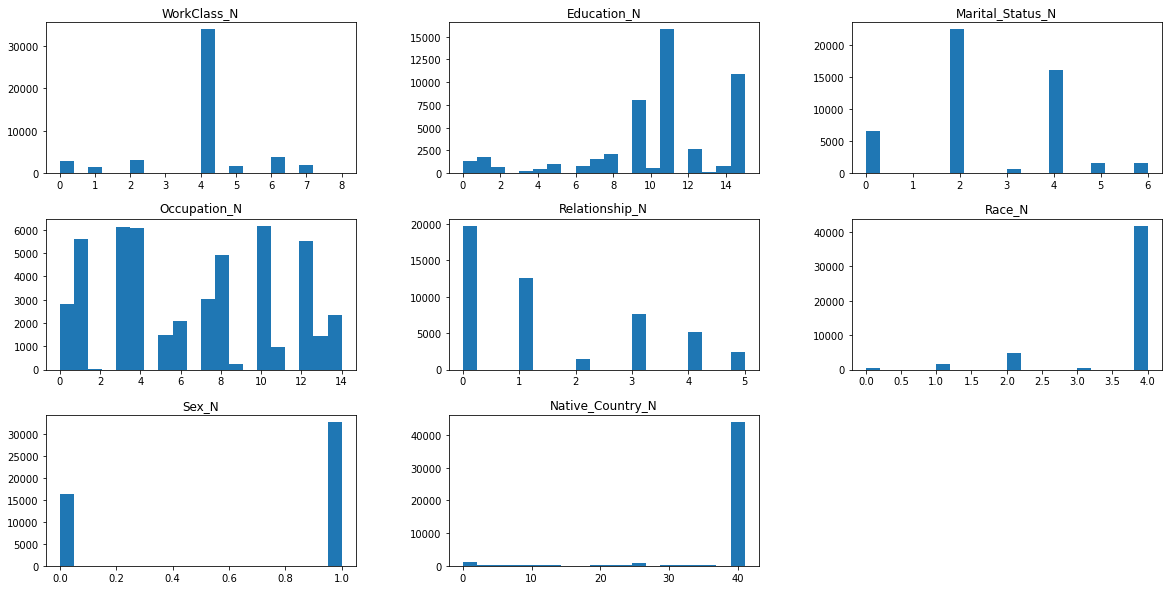

In [71]:
# Creating plots for categorical data

# Create subset
df_categorical_subset = df.iloc[:, 15:]

# Create histograms
df_categorical_subset.hist(figsize=(20, 10), grid=False, bins=20)

In [80]:
prediction_decoded = labelencoder.inverse_transform(df.iloc[:,16])
print(prediction_decoded)

[' Cambodia' ' Germany' ' Ecuador' ... ' Germany' ' Germany' ' Germany']


In [73]:
# Creating the train and test data
y = df.iloc[:,7]
X = df.drop('class', axis=1)
X_train, y_train, X_test, y_test = skms.train_test_split(X, y, test_size=0.33, random_state=42)

In [74]:
# Scaling the data so it will all be weighted the same
scaler = skpp.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

ValueError: could not convert string to float: ' Private'